In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

In [3]:
def function(X1, X2):
    return 100*(X2-X1**2)**2 + (X1-1)**2

def gradient1(X):
    X1 = X[0]
    X2 = X[1]
    grad = np.zeros([2, 1])
    grad[0] = 200*(X2-X1**2)*(-2*X1) + 2*(X1-1)
    grad[1] = 200*(X2-X1**2)
    return grad.T

def gradient2(X):
    X1 = X[0]
    X2 = X[1]
    grad = np.zeros([2, 2])
    grad[0, 0] = -400*(X2-3*X1**2) + 2
    grad[1, 0] = -400*X1
    grad[0, 1] = -400*X1
    grad[1, 1] = 200
    return grad

In [4]:
def gradient_descent(initial_val, iterations, alpha_val):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 2])
    x_val[0] = initial_val
    for i in range(iterations):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - alpha_val*gradient1(x_val[i])
    return iter_val, x_val

def gradient_descent_ball(initial_val, iterations, alpha_val, beta_val):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 2])
    x_val[0] = initial_val
    x_val[1] = x_val[0] - alpha_val*gradient1(x_val[0])
    for i in range(1, iterations):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - alpha_val*gradient1(x_val[i]) + beta_val*(x_val[i]-x_val[i-1])
    return iter_val, x_val

def nesterov(initial_val, iterations, alpha_val, beta_val):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 2])
    x_val[0] = initial_val
    x_val[1] = x_val[0] - alpha_val*gradient1(x_val[0])
    for i in range(1, iterations):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - alpha_val*gradient1(x_val[i] + beta_val*(x_val[i]-x_val[i-1])) + beta_val*(x_val[i]-x_val[i-1])
    return iter_val, x_val

def newton_method(initial_val, iterations):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 2])
    x_val[0] = initial_val
    for i in range(iterations):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - (np.linalg.inv(gradient2(x_val[i]))@gradient1(x_val[i]).T).T
    return iter_val, x_val

def quasi_newton(initial_val, iterations, alpha_val):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 2])
    x_val[0] = initial_val
    for i in range(iterations):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - alpha_val*(np.linalg.inv(gradient2(x_val[i])*np.eye(2))@gradient1(x_val[i]).T).T
    return iter_val, x_val

def RMSProp(initial_val, v_initial, iterations, alpha_val, beta_val):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 2])
    x_val[0] = initial_val
    v_val = np.zeros([iterations+1, 2])
    v_val[0] = v_initial
    for i in range(1, iterations):
        iter_val[i] = i
        v_val[i+1] = beta_val*v_val[i] + (1-beta_val)*gradient1(x_val[i])**2
        x_val[i+1] = x_val[i] - alpha_val*gradient1(x_val[i])/(v_val[i+1])**.5
    return iter_val, x_val

def Adam(initial_val, m_initial, v_initial, iterations, alpha_val, beta_val, epsilon):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 2])
    x_val[0] = initial_val
    v_val = np.zeros([iterations+1, 2])
    v_val[0] = v_initial
    m_val = np.zeros([iterations+1, 2])
    m_val[0] = m_initial
    for i in range(1, iterations):
        iter_val[i] = i
        m_val[i+1] = beta_val*m_val[i] + (1-beta_val)*gradient1(x_val[i])
        v_val[i+1] = beta_val*v_val[i] + (1-beta_val)*gradient1(x_val[i])**2
        m = m_val[i+1]/(1-beta_val**(i+1))
        v = v_val[i+1]/(1-beta_val**(i+1))
        x_val[i+1] = x_val[i] - alpha_val*m/(v**.5 + epsilon)
    return iter_val, x_val

In [5]:
iterations = 10000
alpha_val = 0.001
beta_val = 0.9
epsilon = 0.1
initial_val = np.array([1, 2])
v_initial = np.array([.1, .2])
m_initial = np.array([.3, .8])

[[1.         2.        ]
 [1.4        1.8       ]
 [1.3096     1.832     ]
 ...
 [1.01150574 1.02318959]
 [1.01150123 1.02318045]
 [1.01149672 1.0231713 ]]


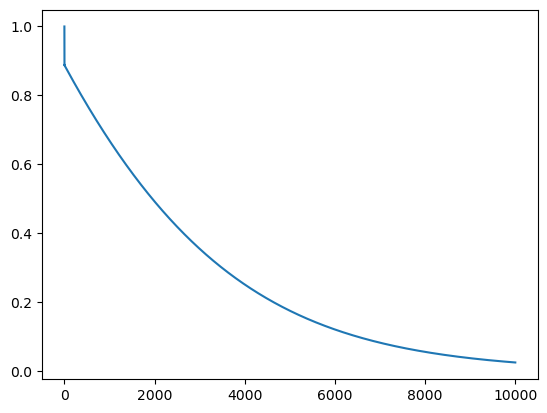

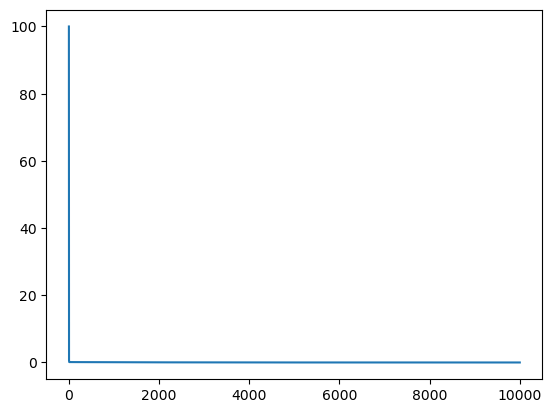

In [9]:
time, x_val_gd = gradient_descent(initial_val, iterations, alpha_val) #10k, 0.001
print(x_val_gd)
x_star = (1, 1)
# Plot error
plt.plot(time, np.linalg.norm(x_val_gd-x_star, axis=1, keepdims=True))
plt.show()
# Plot function error from x_star
plt.plot(time, abs(function(x_val_gd[:, 0], x_val_gd[:, 1])-function(x_star[0], x_star[1])))
plt.show()
#plt.plot(time, np.linalg.norm(x_val_gd-x_val_gd[iterations], axis=1, keepdims=True))
# time, x_val_gd = gradient_descent_ball(initial_val, iterations, alpha_val, beta_val)#1k, 0.001
# print(x_val_gd)
# plt.plot(time, np.linalg.norm(x_val_gd-x_val_gd[iterations], axis=1, keepdims=True))
# time, x_val_gd = nesterov(initial_val, iterations, alpha_val, beta_val=0.9)
# print(x_val_gd)
# plt.plot(time, np.linalg.norm(x_val_gd-x_val_gd[iterations], axis=1, keepdims=True))
# time, x_val_gd = newton_method(initial_val, iterations)
# print(x_val_gd)
# plt.plot(time, np.linalg.norm(x_val_gd-x_val_gd[iterations], axis=1, keepdims=True))
# time, x_val_gd = quasi_newton(initial_val, iterations, alpha_val)
# print(x_val_gd)
# plt.plot(time, np.linalg.norm(x_val_gd-x_val_gd[iterations], axis=1, keepdims=True))
# time, x_val_gd = RMSProp(initial_val, v_initial, iterations, alpha_val, beta_val)
# print(x_val_gd)
# plt.plot(time, np.linalg.norm(x_val_gd-x_val_gd[iterations], axis=1, keepdims=True))
# time, x_val_gd = Adam(initial_val, m_initial, v_initial, iterations, alpha_val, beta_val, epsilon)
# print(x_val_gd)
# plt.plot(time, np.linalg.norm(x_val_gd-x_val_gd[iterations], axis=1, keepdims=True))

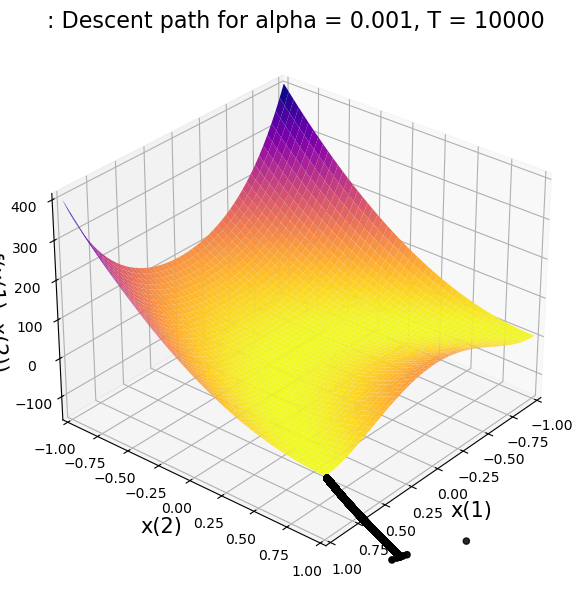

In [10]:
x1 = np.linspace(-1, 1, 100).reshape(100, 1)
x2 = np.linspace(-1, 1, 100).reshape(100, 1)
X, Y = np.meshgrid(x1, x2)
Z = function(X, Y)

k = 0
algList = ['Gradient Descent', 'Heavy Ball Descent', 'Nesterov Descent', 'Newton Method', 'Quasi Newton Method', 'RMSProp', 'Adam']
for x in [x_val_gd]:

    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')

    ax.set_xlim3d([-1.0, 1.0])
    ax.set_xlabel('x(1)', fontsize = 15)

    ax.set_ylim3d([-1.0, 1.0])
    ax.set_ylabel('x(2)', fontsize = 15)

    ax.set_zlim3d([-150, np.max(Z)])
    ax.set_zlabel('f(x(1), x(2))', fontsize = 15)

    # Plot the x's
    ax.scatter(x[:, 0], x[:, 1], color='black', linewidth=1)

    ax.plot_surface(X, Y, Z, cmap='plasma_r')
    plt.title(f': Descent path for alpha = {alpha_val}, T = {iterations}', fontsize=16)
    ax.view_init(30, 40)

    
    # #Generating animation for path
    # def gen(n):
    #     n = len(x)
    #     for i in range(n):
    #         yield np.array([x[i, 0], x[i, 1], function(x[i, 0], x[i, 1])])

    # def update(num, data, line):
    #     line.set_data(data[:2, :num])
    #     line.set_3d_properties(data[2, :num])

    # N = 100
    # data = np.array(list(gen(N))).T
    # line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1], linewidth=2)
    

    # anim = FuncAnimation(fig, update, int(N), fargs=(data, line), interval=0.5*N, blit=False)
    # line.set_color('black')
    # video = anim.to_html5_video()
    # html = display.HTML(video)
    # display.display(html)
    plt.show()